#**Data Loading**

---

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d jessicali9530/lfw-dataset -p /datasets


 84% 95.0M/112M [00:01<00:00, 104MB/s] 
100% 112M/112M [00:01<00:00, 96.8MB/s]


In [ ]:
!unzip /datasets/lfw-dataset.zip -d /datasets/lfw-dataset

Streaming output truncated to the last 5000 lines.
  inflating: /datasets/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0022.jpg  
  inflating: /datasets/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0023.jpg  
  inflating: /datasets/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0024.jpg  
  inflating: /datasets/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0025.jpg  
  inflating: /datasets/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0026.jpg  
  inflating: /datasets/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0027.jpg  
  inflating: /datasets/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0028.jpg  
  inflating: /datasets/lf

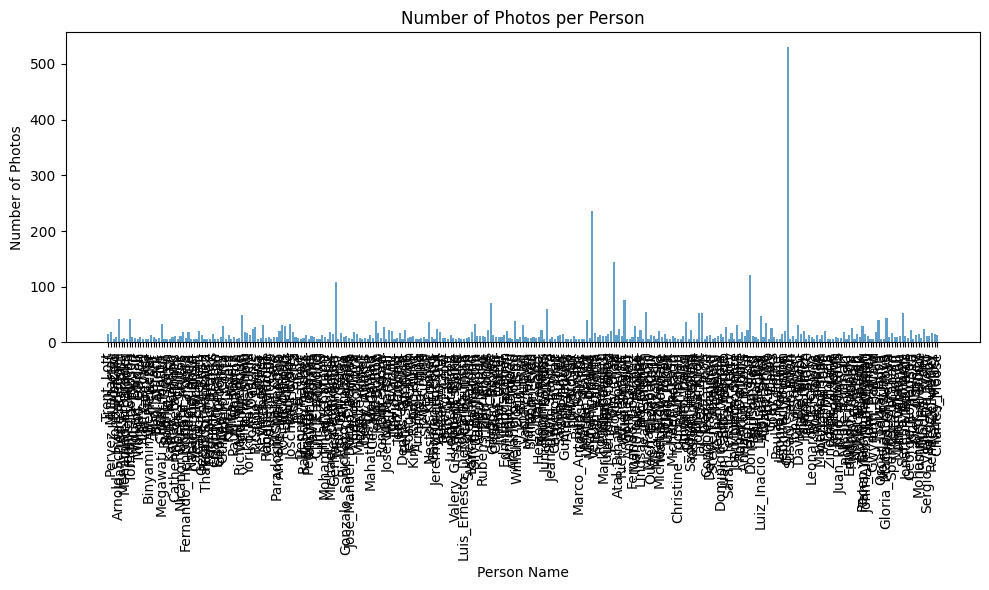

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

DATA_DIR = '/datasets/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled'

# Get all the person labels
labels = []
for person_dir in os.listdir(DATA_DIR):
    if os.path.isdir(os.path.join(DATA_DIR, person_dir)):
        num_images = len(os.listdir(os.path.join(DATA_DIR, person_dir)))
        if num_images > 5:
            labels.append(person_dir)

# Count the occurrences of each label
label_counts = {label: 0 for label in labels}
for label in labels:
    label_counts[label] = len(os.listdir(os.path.join(DATA_DIR, label)))

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(range(len(label_counts)), label_counts.values(), align='center', alpha=0.7)
plt.xticks(range(len(label_counts)), label_counts.keys(), rotation=90)
plt.xlabel('Person Name')
plt.ylabel('Number of Photos')
plt.title('Number of Photos per Person')
plt.tight_layout()
plt.show()


#**Data PreProcessing**

---

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

DATA_DIR = '/datasets/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled'
IMAGE_SIZE = (50, 50)

data = []
labels = []

# Iterate through each person's directory in the dataset
for person_dir in os.listdir(DATA_DIR):
    if os.path.isdir(os.path.join(DATA_DIR, person_dir)):
        # Count the number of images for the current person
        num_images = len(os.listdir(os.path.join(DATA_DIR, person_dir)))

        # Only include classes with more than 70 images
        if num_images > 70:
            for image_file in os.listdir(os.path.join(DATA_DIR, person_dir)):
                image_path = os.path.join(DATA_DIR, person_dir, image_file)
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.resize(image, IMAGE_SIZE)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    # image = image / 255.0  # Normalize pixel values
                    data.append(image)
                    labels.append(person_dir)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Number of samples:", len(data))
print("Number of unique labels:", len(np.unique(labels)))

print("Shape of filtered training data:", X_train.shape)
print("Shape of filtered training labels:", y_train.shape)
print("Shape of filtered test data:", X_test.shape)
print("Shape of filtered test labels:", y_test.shape)


Number of samples: 1288
Number of unique labels: 7
Shape of filtered training data: (1030, 50, 50, 3)
Shape of filtered training labels: (1030,)
Shape of filtered test data: (258, 50, 50, 3)
Shape of filtered test labels: (258,)


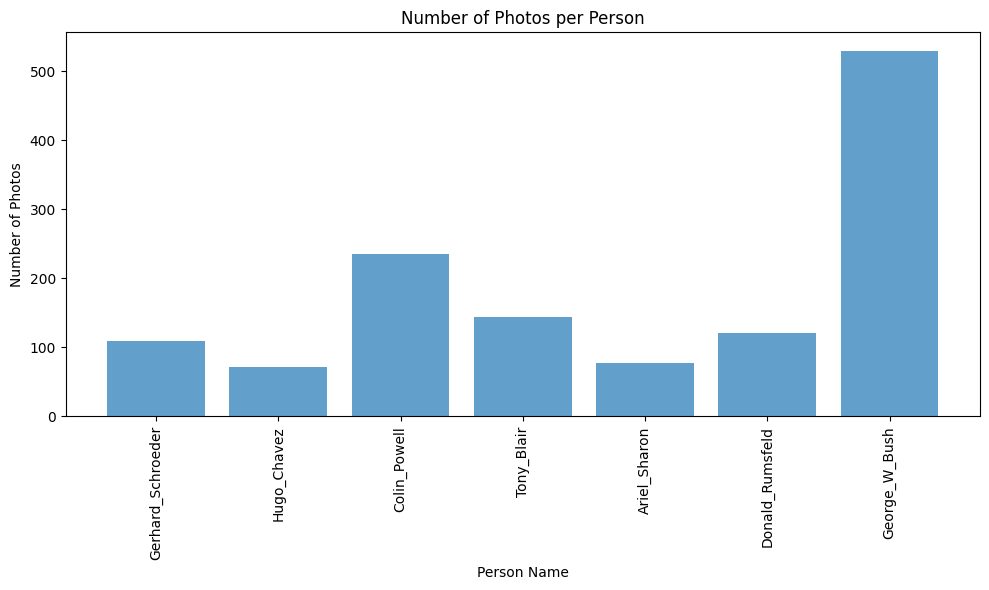

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

DATA_DIR = '/datasets/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled'

labels = []
for person_dir in os.listdir(DATA_DIR):
    if os.path.isdir(os.path.join(DATA_DIR, person_dir)):
        num_images = len(os.listdir(os.path.join(DATA_DIR, person_dir)))
        if num_images > 70:
            labels.append(person_dir)

label_counts = {label: 0 for label in labels}
for label in labels:
    label_counts[label] = len(os.listdir(os.path.join(DATA_DIR, label)))

plt.figure(figsize=(10, 6))
plt.bar(range(len(label_counts)), label_counts.values(), align='center', alpha=0.7)
plt.xticks(range(len(label_counts)), label_counts.keys(), rotation=90)
plt.xlabel('Person Name')
plt.ylabel('Number of Photos')
plt.title('Number of Photos per Person')
plt.tight_layout()
plt.show()


In [ ]:
unique_labels_train, label_counts_train = np.unique(y_train, return_counts=True)
filtered_labels_train = unique_labels_train[label_counts_train > 0]

filtered_indices_train = np.isin(y_train, filtered_labels_train)
X_train_filtered = X_train[filtered_indices_train]
y_train_filtered = y_train[filtered_indices_train]

print("Shape of filtered training data:", X_train_filtered.shape)
print("Shape of filtered training labels:", y_train_filtered.shape)

unique_labels_test, label_counts_test = np.unique(y_test, return_counts=True)
filtered_labels_test = unique_labels_test[label_counts_test > 0]

filtered_indices_test = np.isin(y_test, filtered_labels_test)
X_test_filtered = X_test[filtered_indices_test]
y_test_filtered = y_test[filtered_indices_test]

print("Shape of filtered test data:", X_test_filtered.shape)
print("Shape of filtered test labels:", y_test_filtered.shape)

Shape of filtered training data: (1030, 50, 50, 3)
Shape of filtered training labels: (1030,)
Shape of filtered test data: (258, 50, 50, 3)
Shape of filtered test labels: (258,)


In [ ]:
import numpy as np

unique_labels_train_filtered = np.unique(y_train_filtered)
print("Unique labels in filtered training data:", unique_labels_train_filtered)

unique_labels_test_filtered = np.unique(y_test_filtered)
print("Unique labels in filtered test data:", unique_labels_test_filtered)

Unique labels in filtered training data: ['Ariel_Sharon' 'Colin_Powell' 'Donald_Rumsfeld' 'George_W_Bush'
 'Gerhard_Schroeder' 'Hugo_Chavez' 'Tony_Blair']
Unique labels in filtered test data: ['Ariel_Sharon' 'Colin_Powell' 'Donald_Rumsfeld' 'George_W_Bush'
 'Gerhard_Schroeder' 'Hugo_Chavez' 'Tony_Blair']


In [ ]:
import csv
import numpy as np

# Assuming y_train_filtered is your array of labels
y_train_filtered = np.array(['Ariel_Sharon', 'Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush',
 'Gerhard_Schroeder', 'Hugo_Chavez', 'Tony_Blair'])

unique_labels_train_filtered = np.unique(y_train_filtered)

# Specify the file path
csv_file_path = "unique_labels.csv"

# Write the unique labels to a CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Unique labels"])
    for label in unique_labels_train_filtered:
        writer.writerow([label])

print("Unique labels saved to", csv_file_path)


Unique labels saved to unique_labels.csv


#**LDA**

---

In [ ]:
import numpy as np

class LDA:
    def fit(self, X, y):
        class_labels = np.unique(y)
        class_means = []
        overall_mean = np.mean(X, axis=0)

        for label in class_labels:
            class_X = X[y == label]
            class_means.append(np.mean(class_X, axis=0))

        self.class_means = np.array(class_means)
        self.overall_mean = overall_mean

        #between-class scatter matrix
        between_class_scatter = np.zeros((X.shape[1], X.shape[1]))
        for label, class_mean in zip(class_labels, class_means):
            n_samples = X[y == label].shape[0]
            diff = (class_mean - overall_mean).reshape(-1, 1)
            between_class_scatter += n_samples * np.dot(diff, diff.T)

        #within-class scatter matrix
        within_class_scatter = np.zeros((X.shape[1], X.shape[1]))
        for label, class_mean in zip(class_labels, class_means):
            class_X = X[y == label]
            diff = class_X - class_mean
            within_class_scatter += np.dot(diff.T, diff)

        eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter) @ between_class_scatter)

        sorted_indices = np.argsort(eigen_values)[::-1]
        self.eigen_vectors = eigen_vectors[:, sorted_indices]

    def transform(self, X, n_components):
        return np.dot(X, self.eigen_vectors[:, :n_components])

In [ ]:
from PIL import Image

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train_2d = X_train_filtered.reshape(X_train_filtered.shape[0], -1)
X_test_2d = X_test_filtered.reshape(X_test_filtered.shape[0], -1)

lda = LDA(n_components=None)

X_train_lda = lda.fit_transform(X_train_2d, y_train_filtered)
X_test_lda = lda.transform(X_test_2d)
print(X_test_2d.shape)
joblib.dump(lda, 'lda_model.pkl')

classifiers = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for clf_name, clf in classifiers.items():
  clf.fit(X_train_lda, y_train_filtered)
  test_image = "/content/tonyy.jpg"
  print("clf = ", clf_name)
  # Load and preprocess the test image
  image = Image.open(test_image)
  resized_image = image.resize((50, 50))
  image_array = np.array(resized_image)
  flat_image_array = image_array.flatten()
  test_features = flat_image_array.reshape(1, -1)
  test_lda = lda.transform(test_features)
  test_pred = clf.predict(test_lda).reshape(-1,1)
  decoded_pred = encoder.inverse_transform(test_pred[0])
  print("Prediction: ", decoded_pred)
  y_pred = clf.predict(X_test_lda)
  accuracy = accuracy_score(y_test_filtered, y_pred)
  print(f"{clf_name} accuracy:", accuracy)


(258, 7500)
clf =  SVM
Prediction:  ['Tony_Blair']
SVM accuracy: 0.8837209302325582
clf =  Random Forest
Prediction:  ['Tony_Blair']
Random Forest accuracy: 0.8604651162790697
clf =  KNN
Prediction:  ['Tony_Blair']
KNN accuracy: 0.8643410852713178
clf =  Gradient Boosting
Prediction:  ['Tony_Blair']
Gradient Boosting accuracy: 0.8410852713178295


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_filtered = encoder.fit_transform(y_train_filtered)
y_test_filtered = encoder.fit_transform(y_test_filtered)
# Now, y_train_encoded contains the encoded version of y_train_filtered


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

# Train the SVM model
svm_model = SVC()
svm_model.fit(X_train_lda, y_train_filtered)
joblib.dump(svm_model, 'svm_model.pkl')
# # Save the trained model
# joblib.dump(svm_model, 'svm_model.joblib')

# # Load the saved model
# loaded_model = joblib.load('svm_model.joblib')

# Load and preprocess the test image
test_image = "/content/tonyy.jpg"
image = Image.open(test_image)
resized_image = image.resize((50, 50))
image_array = np.array(resized_image)
flat_image_array = image_array.flatten()
test_features = flat_image_array.reshape(1, -1)
test_lda = lda.transform(test_features)

# Predict using the loaded model
test_pred = svm_model.predict(test_lda).reshape(-1, 1)
decoded_pred = encoder.inverse_transform(test_pred[0])
print("Prediction:", decoded_pred)

# Predict on test set and calculate accuracy
y_pred = svm_model.predict(X_test_lda)
accuracy = accuracy_score(y_test_filtered, y_pred)
print("Model accuracy:", accuracy)


Prediction: ['Tony_Blair']
Model accuracy: 0.8837209302325582


#**Local Binary Pattern Extraction**

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from skimage.feature import local_binary_pattern
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from skimage.color import rgb2gray

def extract_lbp_features(images):
    lbp_features = []
    for img in images:
        gray_img = rgb2gray(img)
        lbp = local_binary_pattern(gray_img, P=8, R=1, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 10), range=(0, 10))
        lbp_features.append(hist)
    return np.array(lbp_features)

In [ ]:
lbp_train_features = extract_lbp_features(X_train_filtered)
lbp_test_features = extract_lbp_features(X_test_filtered)

In [ ]:
import numpy as np
np.save('lbp_train_features.npy', lbp_train_features)
np.save('lbp_test_features.npy', lbp_test_features)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC()
svm_classifier.fit(lbp_train_features, y_train_filtered)
svm_train_pred = svm_classifier.predict(lbp_train_features)
svm_test_pred = svm_classifier.predict(lbp_test_features)
svm_train_accuracy = accuracy_score(y_train_filtered, svm_train_pred)
svm_test_accuracy = accuracy_score(y_test_filtered, svm_test_pred)
print("SVM Classifier Training Accuracy:", svm_train_accuracy)
print("SVM Classifier Testing Accuracy:", svm_test_accuracy)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(lbp_train_features, y_train_filtered)
rf_train_pred = rf_classifier.predict(lbp_train_features)
rf_test_pred = rf_classifier.predict(lbp_test_features)
rf_train_accuracy = accuracy_score(y_train_filtered, rf_train_pred)
rf_test_accuracy = accuracy_score(y_test_filtered, rf_test_pred)
print("Random Forest Classifier Training Accuracy:", rf_train_accuracy)
print("Random Forest Classifier Testing Accuracy:", rf_test_accuracy)

# K-Nearest Neighbors (KNN) Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(lbp_train_features, y_train_filtered)
knn_train_pred = knn_classifier.predict(lbp_train_features)
knn_test_pred = knn_classifier.predict(lbp_test_features)
knn_train_accuracy = accuracy_score(y_train_filtered, knn_train_pred)
knn_test_accuracy = accuracy_score(y_test_filtered, knn_test_pred)
print("KNN Classifier Training Accuracy:", knn_train_accuracy)
print("KNN Classifier Testing Accuracy:", knn_test_accuracy)

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(lbp_train_features, y_train_filtered)
gb_train_pred = gb_classifier.predict(lbp_train_features)
gb_test_pred = gb_classifier.predict(lbp_test_features)
gb_train_accuracy = accuracy_score(y_train_filtered, gb_train_pred)
gb_test_accuracy = accuracy_score(y_test_filtered, gb_test_pred)
print("Gradient Boosting Classifier Training Accuracy:", gb_train_accuracy)
print("Gradient Boosting Classifier Testing Accuracy:", gb_test_accuracy)

from sklearn.linear_model import LogisticRegression

# Logistic Regression Classifier
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(lbp_train_features, y_train_filtered)
lr_train_pred = lr_classifier.predict(lbp_train_features)
lr_test_pred = lr_classifier.predict(lbp_test_features)
lr_train_accuracy = accuracy_score(y_train_filtered, lr_train_pred)
lr_test_accuracy = accuracy_score(y_test_filtered, lr_test_pred)
print("Logistic Regression Classifier Training Accuracy:", lr_train_accuracy)
print("Logistic Regression Classifier Testing Accuracy:", lr_test_accuracy)


SVM Classifier Training Accuracy: 0.46116504854368934
SVM Classifier Testing Accuracy: 0.4069767441860465
Random Forest Classifier Training Accuracy: 1.0
Random Forest Classifier Testing Accuracy: 0.42248062015503873
KNN Classifier Training Accuracy: 0.5553398058252427
KNN Classifier Testing Accuracy: 0.35658914728682173
Gradient Boosting Classifier Training Accuracy: 0.8514563106796117
Gradient Boosting Classifier Testing Accuracy: 0.39147286821705424
Logistic Regression Classifier Training Accuracy: 0.47572815533980584
Logistic Regression Classifier Testing Accuracy: 0.42248062015503873


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

lbp_train_features = lbp_train_features.reshape(X_train_filtered.shape[0], -1)
lbp_test_features = lbp_test_features.reshape(X_test_filtered.shape[0], -1)

lda = LDA(n_components=None)
X_train_lda = lda.fit_transform(lbp_train_features, y_train_filtered)
X_test_lda = lda.transform(lbp_test_features)

classifiers = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for clf_name, clf in classifiers.items():
    clf.fit(X_train_lda, y_train_filtered)
    y_pred = clf.predict(X_test_lda)
    accuracy = accuracy_score(y_test_filtered, y_pred)
    print(f"{clf_name} accuracy:", accuracy)


SVM accuracy: 0.4108527131782946
Random Forest accuracy: 0.41472868217054265
KNN accuracy: 0.375968992248062
Gradient Boosting accuracy: 0.3875968992248062


Number of samples: 1288
Number of unique labels: 7
Shape of filtered training data: (1030, 50, 50, 3)
Shape of filtered training labels: (1030,)
Shape of filtered test data: (258, 50, 50, 3)
Shape of filtered test labels: (258,)
Shape of filtered training data: (1030, 50, 50, 3)
Shape of filtered training labels: (1030,)
Shape of filtered test data: (258, 50, 50, 3)
Shape of filtered test labels: (258,)
Unique labels in filtered training data: ['Ariel_Sharon' 'Colin_Powell' 'Donald_Rumsfeld' 'George_W_Bush'
 'Gerhard_Schroeder' 'Hugo_Chavez' 'Tony_Blair']
Unique labels saved to unique_labels.csv
LBP Feature shape: (1, 9)


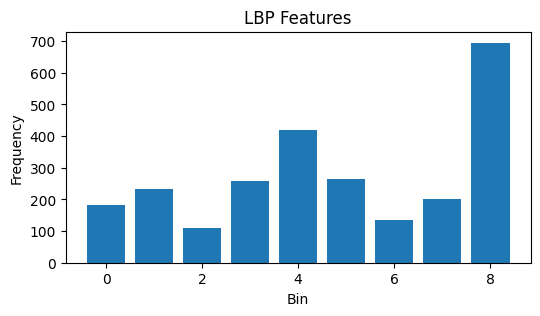

LBP Feature shape: (1, 9)


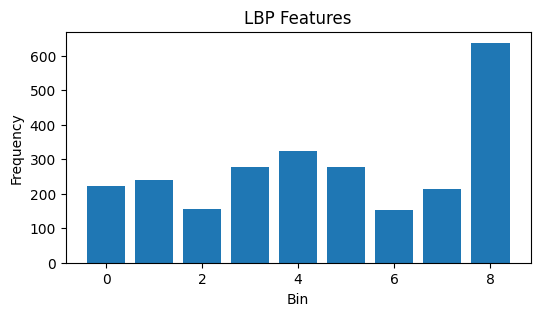

LBP Feature shape: (1, 9)


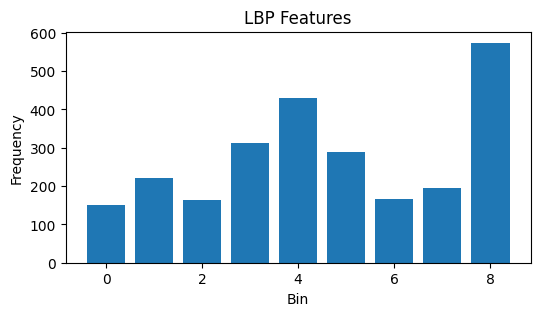

LBP Feature shape: (1, 9)


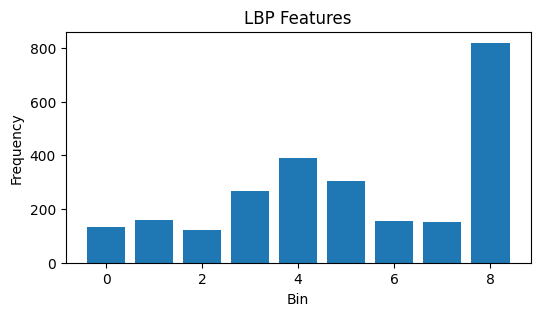

LBP Feature shape: (1, 9)


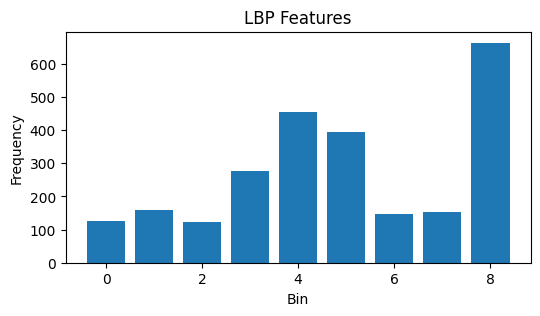

LBP Feature shape: (1, 9)


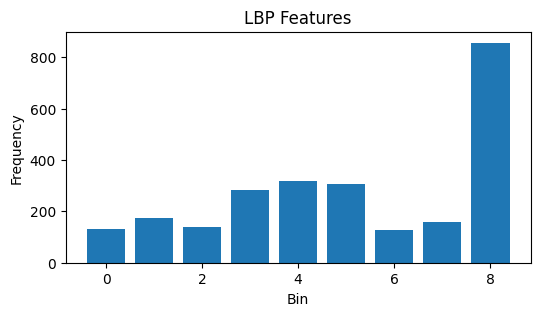

LBP Feature shape: (1, 9)


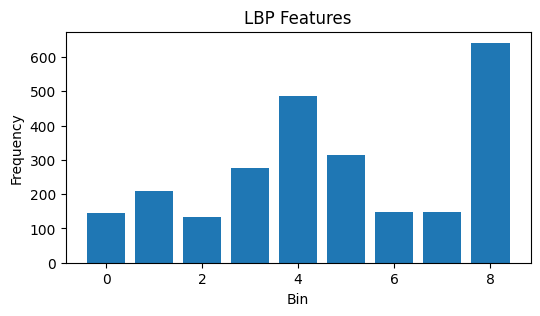

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray

DATA_DIR = '/datasets/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled'
IMAGE_SIZE = (50, 50)

data = []
labels = []

# Iterate through each person's directory in the dataset
for person_dir in os.listdir(DATA_DIR):
    if os.path.isdir(os.path.join(DATA_DIR, person_dir)):
        # Count the number of images for the current person
        num_images = len(os.listdir(os.path.join(DATA_DIR, person_dir)))

        # Only include classes with more than 70 images
        if num_images > 70:
            for image_file in os.listdir(os.path.join(DATA_DIR, person_dir)):
                image_path = os.path.join(DATA_DIR, person_dir, image_file)
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.resize(image, IMAGE_SIZE)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    # image = image / 255.0  # Normalize pixel values
                    data.append(image)
                    labels.append(person_dir)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Number of samples:", len(data))
print("Number of unique labels:", len(np.unique(labels)))

print("Shape of filtered training data:", X_train.shape)
print("Shape of filtered training labels:", y_train.shape)
print("Shape of filtered test data:", X_test.shape)
print("Shape of filtered test labels:", y_test.shape)

unique_labels_train, label_counts_train = np.unique(y_train, return_counts=True)
filtered_labels_train = unique_labels_train[label_counts_train > 0]

filtered_indices_train = np.isin(y_train, filtered_labels_train)
X_train_filtered = X_train[filtered_indices_train]
y_train_filtered = y_train[filtered_indices_train]

print("Shape of filtered training data:", X_train_filtered.shape)
print("Shape of filtered training labels:", y_train_filtered.shape)

unique_labels_test, label_counts_test = np.unique(y_test, return_counts=True)
filtered_labels_test = unique_labels_test[label_counts_test > 0]

filtered_indices_test = np.isin(y_test, filtered_labels_test)
X_test_filtered = X_test[filtered_indices_test]
y_test_filtered = y_test[filtered_indices_test]

print("Shape of filtered test data:", X_test_filtered.shape)
print("Shape of filtered test labels:", y_test_filtered.shape)

import csv
import numpy as np

# Assuming y_train_filtered is your array of labels
y_train_filtered = np.array(['Ariel_Sharon', 'Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush',
 'Gerhard_Schroeder', 'Hugo_Chavez', 'Tony_Blair'])

unique_labels_train_filtered = np.unique(y_train_filtered)
print("Unique labels in filtered training data:", unique_labels_train_filtered)

# Define selected_persons based on filtered labels
selected_persons = unique_labels_train_filtered

# Specify the file path
csv_file_path = "unique_labels.csv"

# Write the unique labels to a CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Unique labels"])
    for label in unique_labels_train_filtered:
        writer.writerow([label])

print("Unique labels saved to", csv_file_path)

# Function to extract LBP features for an image
def extract_lbp_features(images):
    lbp_features = []
    for img in images:
        gray_img = rgb2gray(img)
        lbp = local_binary_pattern(gray_img, P=8, R=1, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 10), range=(0, 10))
        lbp_features.append(hist)
    return np.array(lbp_features)

# Loop through each person's images and plot LBP features
for person in selected_persons:
    person_images = []  # Load person's images
    for i, label in enumerate(y_train_filtered):
        if label == person:
            image = X_train_filtered[i]
            person_images.append(image)

    # Plot LBP features for each image of the person
    for image in person_images:
        lbp_features = extract_lbp_features([image])
        print("LBP Feature shape:", lbp_features.shape)
        plt.figure(figsize=(6, 3))  # Adjust the figure size here
        plt.bar(range(len(lbp_features[0])), lbp_features[0])
        plt.title('LBP Features')
        plt.xlabel('Bin')
        plt.ylabel('Frequency')
        plt.show()


#**Histogram of Oriented Gradient**

---

In [ ]:
from skimage.feature import hog
import numpy as np

def extract_hog_features(images, orientations=9, pixels_per_cell=(4, 4),
                         cells_per_block=(2, 2), block_norm='L2-Hys',
                         visualize=False, transform_sqrt=False,
                         feature_vector=True, multichannel=True,
                         channel_axis=-1):
    hog_features = []
    for img in images:
        # Compute HOG features with specified parameters
        hog_feature = hog(img, orientations=orientations,
                          pixels_per_cell=pixels_per_cell,
                          cells_per_block=cells_per_block,
                          block_norm=block_norm,
                          visualize=visualize, transform_sqrt=transform_sqrt,
                          feature_vector=feature_vector, multichannel=multichannel,
                          channel_axis=channel_axis)  # Specify the channel axis
        hog_features.append(hog_feature)
    return np.array(hog_features)

# Example usage:
# hog_features = extract_hog_features(images, orientations=18, pixels_per_cell=(16, 16), cells_per_block=(3, 3))


In [ ]:
hog_train_features = extract_hog_features(X_train_filtered)
hog_test_features = extract_hog_features(X_test_filtered)

<ipython-input-10-f67190b1c7da>:12: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(img, orientations=orientations,


In [ ]:
import numpy as np
np.save('hog_train_features.npy', hog_train_features)
np.save('hog_test_features.npy', hog_test_features)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define classifiers
classifiers = {
    # "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=3000)  # Adjust max_iter if needed
}

# Train and test each classifier
for clf_name, clf in classifiers.items():
    clf.fit(hog_train_features, y_train_filtered)

    # Training accuracy
    train_pred = clf.predict(hog_train_features)
    train_accuracy = accuracy_score(y_train_filtered, train_pred)

    # Testing accuracy
    test_pred = clf.predict(hog_test_features)
    test_accuracy = accuracy_score(y_test_filtered, test_pred)

    print(f"{clf_name} Classifier:")
    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    print()


Random Forest Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.5348837209302325

KNN Classifier:
Training Accuracy: 0.7378640776699029
Testing Accuracy: 0.6124031007751938

Logistic Regression Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.8217054263565892



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

hog_train_features = hog_train_features.reshape(X_train_filtered.shape[0], -1)
hog_test_features = hog_test_features.reshape(X_test_filtered.shape[0], -1)

lda = LDA(n_components=6)
X_train_lda = lda.fit_transform(hog_train_features, y_train_filtered)
X_test_lda = lda.transform(hog_test_features)

classifiers = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for clf_name, clf in classifiers.items():
    clf.fit(X_train_lda, y_train_filtered)
    y_pred = clf.predict(X_test_lda)
    accuracy = accuracy_score(y_test_filtered, y_pred)
    print(f"{clf_name} accuracy:", accuracy)


SVM accuracy: 0.7713178294573644
Random Forest accuracy: 0.7286821705426356
KNN accuracy: 0.7790697674418605
Gradient Boosting accuracy: 0.7131782945736435


Number of samples: 1288
Number of unique labels: 7
Shape of filtered training data: (1030, 50, 50, 3)
Shape of filtered training labels: (1030,)
Shape of filtered test data: (258, 50, 50, 3)
Shape of filtered test labels: (258,)
Shape of filtered training data: (1030, 50, 50, 3)
Shape of filtered training labels: (1030,)
Shape of filtered test data: (258, 50, 50, 3)
Shape of filtered test labels: (258,)
Unique labels in filtered training data: ['Ariel_Sharon' 'Colin_Powell' 'Donald_Rumsfeld' 'George_W_Bush'
 'Gerhard_Schroeder' 'Hugo_Chavez' 'Tony_Blair']
Unique labels saved to unique_labels.csv


<ipython-input-28-6026ada6bb0c>:100: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


HOG Feature shape: (34596,)


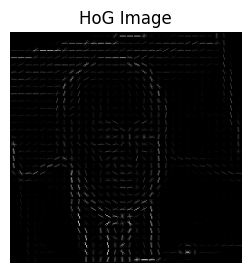

HOG Feature shape: (34596,)


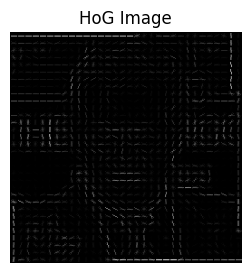

HOG Feature shape: (34596,)


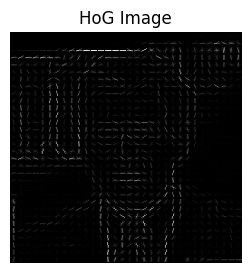

HOG Feature shape: (34596,)


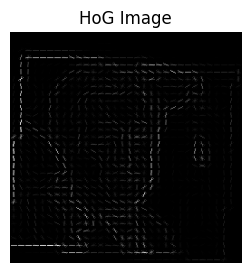

HOG Feature shape: (34596,)


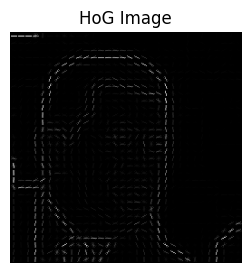

HOG Feature shape: (34596,)


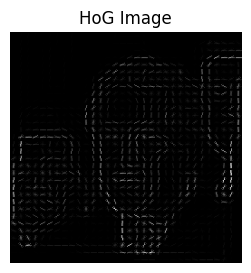

HOG Feature shape: (34596,)


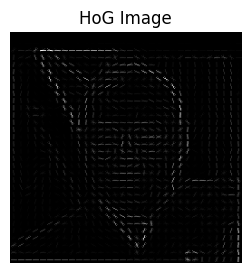

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from skimage.io import imread
from skimage.transform import resize

DATA_DIR = '/datasets/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled'
IMAGE_SIZE = (50, 50)

data = []
labels = []

# Iterate through each person's directory in the dataset
for person_dir in os.listdir(DATA_DIR):
    if os.path.isdir(os.path.join(DATA_DIR, person_dir)):
        # Count the number of images for the current person
        num_images = len(os.listdir(os.path.join(DATA_DIR, person_dir)))

        # Only include classes with more than 70 images
        if num_images > 70:
            for image_file in os.listdir(os.path.join(DATA_DIR, person_dir)):
                image_path = os.path.join(DATA_DIR, person_dir, image_file)
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.resize(image, IMAGE_SIZE)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    # image = image / 255.0  # Normalize pixel values
                    data.append(image)
                    labels.append(person_dir)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Number of samples:", len(data))
print("Number of unique labels:", len(np.unique(labels)))

print("Shape of filtered training data:", X_train.shape)
print("Shape of filtered training labels:", y_train.shape)
print("Shape of filtered test data:", X_test.shape)
print("Shape of filtered test labels:", y_test.shape)

unique_labels_train, label_counts_train = np.unique(y_train, return_counts=True)
filtered_labels_train = unique_labels_train[label_counts_train > 0]

filtered_indices_train = np.isin(y_train, filtered_labels_train)
X_train_filtered = X_train[filtered_indices_train]
y_train_filtered = y_train[filtered_indices_train]

print("Shape of filtered training data:", X_train_filtered.shape)
print("Shape of filtered training labels:", y_train_filtered.shape)

unique_labels_test, label_counts_test = np.unique(y_test, return_counts=True)
filtered_labels_test = unique_labels_test[label_counts_test > 0]

filtered_indices_test = np.isin(y_test, filtered_labels_test)
X_test_filtered = X_test[filtered_indices_test]
y_test_filtered = y_test[filtered_indices_test]

print("Shape of filtered test data:", X_test_filtered.shape)
print("Shape of filtered test labels:", y_test_filtered.shape)

import csv
import numpy as np

# Assuming y_train_filtered is your array of labels
y_train_filtered = np.array(['Ariel_Sharon', 'Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush',
 'Gerhard_Schroeder', 'Hugo_Chavez', 'Tony_Blair'])

unique_labels_train_filtered = np.unique(y_train_filtered)
print("Unique labels in filtered training data:", unique_labels_train_filtered)

# Define selected_persons based on filtered labels
selected_persons = unique_labels_train_filtered

# Specify the file path
csv_file_path = "unique_labels.csv"

# Write the unique labels to a CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Unique labels"])
    for label in unique_labels_train_filtered:
        writer.writerow([label])

print("Unique labels saved to", csv_file_path)

# Function to extract and plot HOG features for an image
def compute_hog(img):
    # resizing image
    resized_img = resize(img, (64 * 4, 64 * 4))
    # creating hog features
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True, multichannel=True)
    return fd, hog_image

# Loop through each person's images and plot HOG features
for person in selected_persons:
    person_images = []  # Load person's images
    for i, label in enumerate(y_train_filtered):
        if label == person:
            image = X_train_filtered[i]
            person_images.append(image)

    # Plot HOG features for each image of the person
    for image in person_images:
        Hog_feature, hog_image = compute_hog(image)
        print("HOG Feature shape:", Hog_feature.shape)
        plt.figure(figsize=(6, 3))  # Adjust the figure size here
        plt.imshow(hog_image, cmap='gray')
        plt.title('HoG Image')
        plt.axis('off')
        plt.show()


#**CNN features**

---

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model

def extract_cnn_features(images):
    base_model = ResNet50(weights='imagenet', include_top=False)

    # Create a model with outputs from one of the intermediate layers
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('conv5_block3_out').output)

    cnn_features = []
    for img in images:
        # Preprocess the image
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)

        # Extract features
        features = model.predict(img)
        cnn_features.append(features.flatten())  # Flatten the features

    return np.array(cnn_features)


In [ ]:
cnn_train_features = extract_cnn_features(X_train_filtered)
cnn_test_features = extract_cnn_features(X_test_filtered)

1/1 [==============================] - 0s 75ms/step


In [ ]:
np.save('cnn_train_features.npy', cnn_train_features)
np.save('cnn_test_features.npy', cnn_test_features)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    # "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=3000)  # Adjust max_iter if needed
}

# Training and testing each classifier
for clf_name, clf in classifiers.items():
    clf.fit(cnn_train_features, y_train_filtered)

    # Training accuracy
    train_pred = clf.predict(cnn_train_features)
    train_accuracy = accuracy_score(y_train_filtered, train_pred)

    # Testing accuracy
    test_pred = clf.predict(cnn_test_features)
    test_accuracy = accuracy_score(y_test_filtered, test_pred)

    print(f"{clf_name} Classifier:")
    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    print()


SVM Classifier:
Training Accuracy: 0.7116504854368932
Testing Accuracy: 0.5155038759689923

Random Forest Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.4496124031007752

KNN Classifier:
Training Accuracy: 0.6300970873786408
Testing Accuracy: 0.437984496124031

Logistic Regression Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.6162790697674418



Number of samples: 1288
Number of unique labels: 7
Shape of filtered training data: (1030, 50, 50, 3)
Shape of filtered training labels: (1030,)
Shape of filtered test data: (258, 50, 50, 3)
Shape of filtered test labels: (258,)
Shape of filtered training data: (1030, 50, 50, 3)
Shape of filtered training labels: (1030,)
Shape of filtered test data: (258, 50, 50, 3)
Shape of filtered test labels: (258,)
Unique labels in filtered training data: ['Ariel_Sharon' 'Colin_Powell' 'Donald_Rumsfeld' 'George_W_Bush'
 'Gerhard_Schroeder' 'Hugo_Chavez' 'Tony_Blair']
Unique labels saved to unique_labels.csv
1/1 [==============================] - 3s 3s/step
CNN Feature shape: (1, 100352)


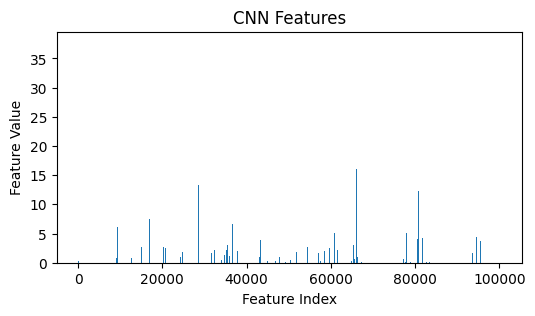

1/1 [==============================] - 1s 1s/step
CNN Feature shape: (1, 100352)


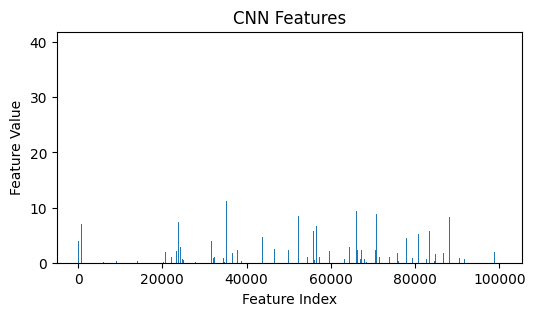

1/1 [==============================] - 1s 1s/step
CNN Feature shape: (1, 100352)


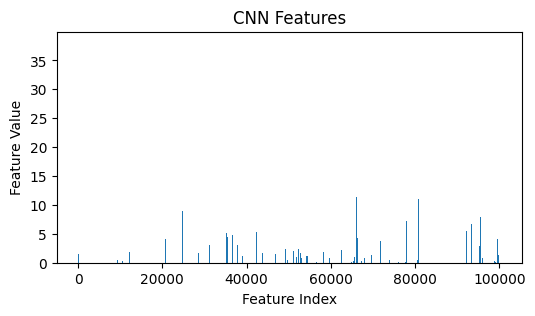

1/1 [==============================] - 1s 1s/step
CNN Feature shape: (1, 100352)


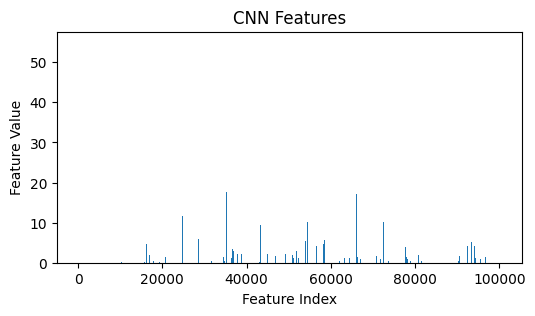

1/1 [==============================] - 1s 1s/step
CNN Feature shape: (1, 100352)


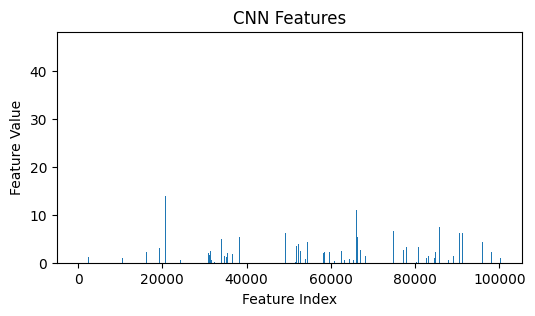

1/1 [==============================] - 2s 2s/step
CNN Feature shape: (1, 100352)


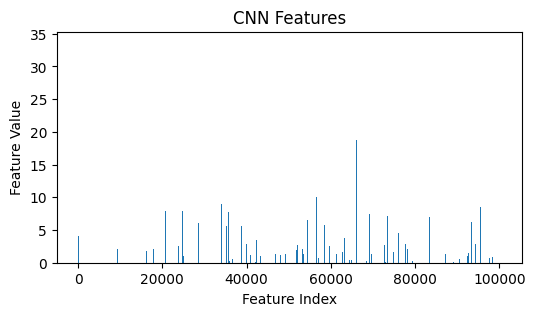

1/1 [==============================] - 1s 1s/step
CNN Feature shape: (1, 100352)


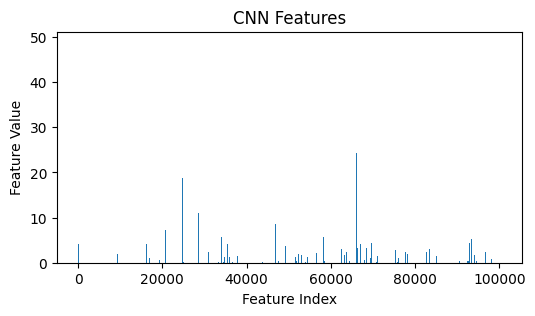

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Model

DATA_DIR = '/datasets/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled'
IMAGE_SIZE = (50, 50)

data = []
labels = []

# Iterate through each person's directory in the dataset
for person_dir in os.listdir(DATA_DIR):
    if os.path.isdir(os.path.join(DATA_DIR, person_dir)):
        # Count the number of images for the current person
        num_images = len(os.listdir(os.path.join(DATA_DIR, person_dir)))

        # Only include classes with more than 70 images
        if num_images > 70:
            for image_file in os.listdir(os.path.join(DATA_DIR, person_dir)):
                image_path = os.path.join(DATA_DIR, person_dir, image_file)
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.resize(image, IMAGE_SIZE)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    # image = image / 255.0  # Normalize pixel values
                    data.append(image)
                    labels.append(person_dir)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Number of samples:", len(data))
print("Number of unique labels:", len(np.unique(labels)))

print("Shape of filtered training data:", X_train.shape)
print("Shape of filtered training labels:", y_train.shape)
print("Shape of filtered test data:", X_test.shape)
print("Shape of filtered test labels:", y_test.shape)

unique_labels_train, label_counts_train = np.unique(y_train, return_counts=True)
filtered_labels_train = unique_labels_train[label_counts_train > 0]

filtered_indices_train = np.isin(y_train, filtered_labels_train)
X_train_filtered = X_train[filtered_indices_train]
y_train_filtered = y_train[filtered_indices_train]

print("Shape of filtered training data:", X_train_filtered.shape)
print("Shape of filtered training labels:", y_train_filtered.shape)

unique_labels_test, label_counts_test = np.unique(y_test, return_counts=True)
filtered_labels_test = unique_labels_test[label_counts_test > 0]

filtered_indices_test = np.isin(y_test, filtered_labels_test)
X_test_filtered = X_test[filtered_indices_test]
y_test_filtered = y_test[filtered_indices_test]

print("Shape of filtered test data:", X_test_filtered.shape)
print("Shape of filtered test labels:", y_test_filtered.shape)

import csv
import numpy as np

# Assuming y_train_filtered is your array of labels
y_train_filtered = np.array(['Ariel_Sharon', 'Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush',
 'Gerhard_Schroeder', 'Hugo_Chavez', 'Tony_Blair'])

unique_labels_train_filtered = np.unique(y_train_filtered)
print("Unique labels in filtered training data:", unique_labels_train_filtered)

# Define selected_persons based on filtered labels
selected_persons = unique_labels_train_filtered

# Specify the file path
csv_file_path = "unique_labels.csv"

# Write the unique labels to a CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Unique labels"])
    for label in unique_labels_train_filtered:
        writer.writerow([label])

print("Unique labels saved to", csv_file_path)

# Function to extract CNN features for an image
def extract_cnn_features(images):
    base_model = ResNet50(weights='imagenet', include_top=False)

    # Create a model with outputs from one of the intermediate layers
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('conv5_block3_out').output)

    cnn_features = []
    for img in images:
        # Preprocess the image
        img = cv2.resize(img, (224, 224))  # Resizing image for ResNet50 input size
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR (ResNet50 expects BGR format)
        img = preprocess_input(img)
        img = np.expand_dims(img, axis=0)  # Add batch dimension

        # Extract features
        features = model.predict(img)
        cnn_features.append(features.flatten())  # Flatten the features

    return np.array(cnn_features)

# Loop through each person's images and plot CNN features
for person in selected_persons:
    person_images = []  # Load person's images
    for i, label in enumerate(y_train_filtered):
        if label == person:
            image = X_train_filtered[i]
            person_images.append(image)

    # Plot CNN features for each image of the person
    for image in person_images:
        cnn_features = extract_cnn_features([image])
        print("CNN Feature shape:", cnn_features.shape)
        plt.figure(figsize=(6, 3))  # Adjust the figure size here
        plt.bar(range(len(cnn_features[0])), cnn_features[0])
        plt.title('CNN Features')
        plt.xlabel('Feature Index')
        plt.ylabel('Feature Value')
        plt.show()


#**PCA Feature**

---

In [ ]:
from sklearn.decomposition import PCA

def extract_pca_features(images, n_components=None):
    # Reshape the images into a 2D array
    flattened_images = images.reshape(len(images), -1)
    pca = PCA(n_components=n_components)
    # Apply PCA directly to the 2D array
    pca_features = pca.fit_transform(flattened_images)
    return pca_features

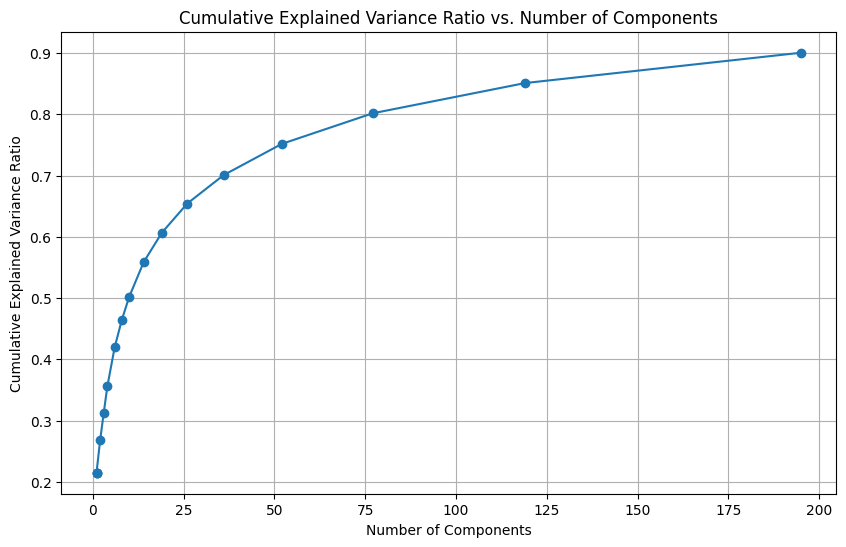

In [ ]:
import matplotlib.pyplot as plt

def plot_cumulative_variance_ratio(images, threshold_range=(0.1, 0.95), step=0.05):
    flattened_images = images.reshape(len(images), -1)
    pca = PCA()
    pca.fit(flattened_images)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    thresholds = np.arange(*threshold_range, step=step)
    n_components_list = []
    cumulative_variance_list = []

    for threshold in thresholds:
        n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
        n_components = min(n_components, min(flattened_images.shape))
        n_components_list.append(n_components)
        cumulative_variance_list.append(cumulative_variance_ratio[n_components - 1])

    plt.figure(figsize=(10, 6))
    plt.plot(n_components_list, cumulative_variance_list, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
    plt.grid(True)
    plt.show()

try:
    plot_cumulative_variance_ratio(X_train_filtered)
except ValueError as e:
    print(f"Error: {e}")


In [ ]:
from sklearn.decomposition import PCA

def find_optimal_n_components(images, threshold=0.85):
    flattened_images = images.reshape(len(images), -1)
    pca = PCA()
    pca.fit(flattened_images)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
    n_components = min(n_components, min(flattened_images.shape))
    n_components = min(n_components, min(flattened_images.shape))
    return n_components

optimal_n_components = find_optimal_n_components(X_train_filtered)
print("Optimal number of components:", optimal_n_components)

Optimal number of components: 119


In [ ]:
pca_train_features = extract_pca_features(X_train_filtered, optimal_n_components)
pca_test_features = extract_pca_features(X_test_filtered, optimal_n_components)

In [ ]:
np.save('pca_train_features.npy', pca_train_features)
np.save('pca_test_features.npy', pca_test_features)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)  # Adjust max_iter if needed
}

# Train and test each classifier
for clf_name, clf in classifiers.items():
    clf.fit(pca_train_features, y_train_filtered)

    # Training accuracy
    train_pred = clf.predict(pca_train_features)
    train_accuracy = accuracy_score(y_train_filtered, train_pred)

    # Testing accuracy
    test_pred = clf.predict(pca_test_features)
    test_accuracy = accuracy_score(y_test_filtered, test_pred)

    print(f"{clf_name} Classifier:")
    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    print()


SVM Classifier:
Training Accuracy: 0.8310679611650486
Testing Accuracy: 0.3953488372093023

Random Forest Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.3682170542635659

KNN Classifier:
Training Accuracy: 0.6495145631067961
Testing Accuracy: 0.35271317829457366

Gradient Boosting Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.35658914728682173

Logistic Regression Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.2441860465116279



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
